In [3]:
import numpy as np

from lib.perceptron import Perceptron
from lib.plot_3d import *

In [8]:
num_values = 100

mean1 = [0,0,0]
mean2 = [5,5,5]
covar = [[1,0,0],[0,1,0],[0,0,1]]

x1 = np.random.multivariate_normal(mean1, covar, (num_values))
print("Shape of gaussian distribution 1: ", x1.shape)

x2 = np.random.multivariate_normal(mean2, covar, (num_values))
print("Shape of gaussian distribution 2: ", x2.shape)

final_x = np.concatenate([x1,x2])
print("Shape of training dataset: ",final_x.shape)

# Adding a 4th dimension for ease of computing along with bias
final_x = np.concatenate([final_x,np.ones(len(final_x)).reshape(len(final_x),1)],axis=1)
print("Shape after adding dimension with constant value: ", final_x.shape)

y1 = np.array([-1 for x in range(num_values)])
y2 = np.array([1 for x in range(num_values)])
final_y = np.concatenate([y1,y2])
print("Shape of label dataset: ",final_y.shape)


Shape of gaussian distribution 1:  (100, 3)
Shape of gaussian distribution 2:  (100, 3)
Shape of training dataset:  (200, 3)
Shape after adding dimension with constant value:  (200, 4)
Shape of label dataset:  (200,)


In [9]:
%%time

l_rate = 0.05
b_size = len(final_x)
init_weights = np.ones(4)

perceptron = Perceptron(dim=3, batch_size=5)

perceptron.fit(final_x,final_y)


Number of batches formed:  40

Summary of epoch : 0 | Total batches : 40 | Total Misclassified : 7
Summary of epoch : 1 | Total batches : 40 | Total Misclassified : 15
Summary of epoch : 2 | Total batches : 40 | Total Misclassified : 0


Classification Hyperplane : 5.34x + 1.97y + 2.85z + -15.97
CPU times: user 6.94 ms, sys: 3.92 ms, total: 10.9 ms
Wall time: 8 ms


(array([  5.34103014,   1.96731488,   2.84837665, -15.96609822]), 3)

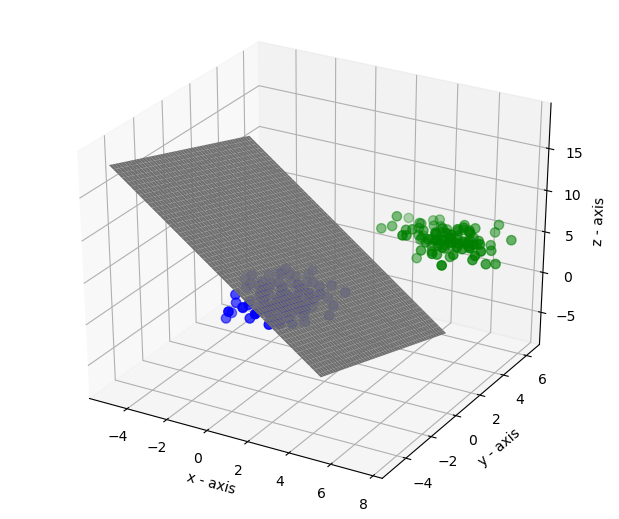

In [10]:
plot_hyperplane(final_x,final_y,perceptron.weights)